## Assignment 3, part 1 of 2

1. Using the notation seen in class, let $\mathcal{L}_3 = \{ \{1,2,3\}, \{1,2,5\}, \{1,3,4\}, \{2, 3, 4\}, \{2, 4, 5\}, \{2, 5, 6\}\}$. Compute the set of candidates $\mathcal{C}_4$.

The set of candidates $\mathcal{C}_4$ obtained by joining every joinable pair of itemsets from $\mathcal{L}_3$:

$\mathcal{C}_4 = \{ \{1,2,3,5\}, \{2,3,4,5\}, \{1,2,3,4\}, \{2,4,5,6\}, \{1,2,4,5\}, \{1,2,5,6\}\}$

However, the 3-itemsets $\{2, 3, 5\}$, $\{3, 4, 5\}$, $\{1, 2, 4\}$, $\{4, 5, 6\}$, $\{1, 2, 4\}$, $\{1, 2, 6\}$ are not frequent from each set in $\mathcal{C}_4$ respectively, since they do not belong to $\mathcal{L}_3$. The Apriori property guarantees that the 4-itemsets obtained in $\mathcal{C}_4$ are also not frequent.

Therefore, C4 = ∅.

2. In the transaction dataset used in the tutorial presented above, for a support threshold of 40%, is the itemset $\{ \text{\{Kidney Beans\}, \{Eggs\}, \{Yogurt\}} \}$ considered frequent?

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te_ary)

[[False False False  True False  True  True  True  True False  True]
 [False False  True  True False  True False  True  True False  True]
 [ True False False  True False  True  True False False False False]
 [False  True False False False  True  True False False  True  True]
 [False  True False  True  True  True False False  True False False]]


In [ ]:
import pandas as pd

df = pd.DataFrame(te_ary, columns=te.columns_)
display(df)

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.4)
display(frequent_itemsets)

itemset = frequent_itemsets.loc[5]
print('Itemset: {0}. Support: {1}.'.format(itemset['itemsets'], itemset['support']))

,support,itemsets
0,0.4,(1)
1,0.8,(3)
2,1.0,(5)
3,0.6,(6)
4,0.4,(7)
5,0.6,(8)
6,0.6,(10)
7,0.4,"(1, 5)"
8,0.8,"(3, 5)"
9,0.4,"(3, 6)"


Itemset: frozenset({8}). Support: 0.6.


In [ ]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
display(frequent_itemsets)

,support,itemsets
0,0.4,(Corn)
1,0.8,(Eggs)
2,1.0,(Kidney Beans)
3,0.6,(Milk)
4,0.4,(Nutmeg)
5,0.6,(Onion)
6,0.6,(Yogurt)
7,0.4,"(Kidney Beans, Corn)"
8,0.8,"(Kidney Beans, Eggs)"
9,0.4,"(Milk, Eggs)"


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) # length of each frozenset
print('Frequent 3-itemsets:')
display(frequent_itemsets[frequent_itemsets['length'] == 3])

Frequent 3-itemsets:


,support,itemsets,length
21,0.4,"(Milk, Kidney Beans, Eggs)",3
22,0.4,"(Nutmeg, Kidney Beans, Eggs)",3
23,0.6,"(Onion, Kidney Beans, Eggs)",3
24,0.4,"(Eggs, Kidney Beans, Yogurt)",3
25,0.4,"(Onion, Eggs, Nutmeg)",3
26,0.4,"(Nutmeg, Eggs, Yogurt)",3
27,0.4,"(Onion, Eggs, Yogurt)",3
28,0.4,"(Milk, Kidney Beans, Yogurt)",3
29,0.4,"(Onion, Kidney Beans, Nutmeg)",3
30,0.4,"(Nutmeg, Kidney Beans, Yogurt)",3


Therefore, for a support threshold of 40%, is the itemset $\{ \text{\{Kidney Beans\}, \{Eggs\}, \{Yogurt\}} \}$ will be considered frequent.

3. Implement a function that receives a binary ``DataFrame`` of transactions and an association rule (represented by a ``frozenset`` of antecedents and a ``frozenset`` of consequents). This function should return the corresponding Kulczynski measure.

In [ ]:
frequent_itemsets = apriori(df, min_support=0.6)
display(frequent_itemsets)

itemset = frequent_itemsets.loc[5]
print('Itemset: {0}. Support: {1}.'.format(itemset['itemsets'], itemset['support']))

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


Itemset: frozenset({3, 5}). Support: 0.8.


In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
display(frequent_itemsets)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"


In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x)) # length of each frozenset
print('Frequent 3-itemsets:')
display(frequent_itemsets[frequent_itemsets['length'] == 3])

Frequent 3-itemsets:


,support,itemsets,length
10,0.6,"(Onion, Kidney Beans, Eggs)",3


In [ ]:
support = {}
for _, row in frequent_itemsets.iterrows():
    support[row['itemsets']] = row['support']

itemset = frozenset(['Onion', 'Eggs'])
print('Itemset: {0}. Support: {1}.'.format(itemset, support[itemset]))

Itemset: frozenset({'Onion', 'Eggs'}). Support: 0.6.


In [ ]:
from mlxtend.frequent_patterns import association_rules

strong_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
display(strong_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


In [ ]:
def cal_kulczynski(itemset, antecendents, consequents):

    rules = association_rules(itemset, metric="confidence", min_threshold=0)

    # Forward & Backward Rule: - Assumed always to return a strong rule
    fwd_rule = rules[(rules['antecedents'] == antecendents) & (rules['consequents'] == consequents)]
    bck_rule = rules[(rules['antecedents'] == consequents) & (rules['consequents'] == antecendents)]

    # Confidences:
    conf_fwd = fwd_rule['confidence'].values[0]

    conf_bck = bck_rule['confidence'].values[0]

    kulc = (conf_bck + conf_fwd) / 2

    return kulc

ants = frozenset(['Onion'])
cons = frozenset(['Kidney Beans','Eggs'])
print('Kulczynski measure: ' + str(cal_kulczynski(frequent_itemsets, ants, cons)))

Kulczynski measure: 0.875


4. Implement a function that receives a binary ``DataFrame`` of transactions and an association rule (represented by a ``frozenset`` of antecedents and a ``frozenset`` of consequents). This function should return the corresponding imbalance ratio.

In [ ]:
def cal_imbal_ratio(itemset, antecendents, consequents):

    ab_set = frozenset.union(antecendents,consequents)

    a = itemset[itemset['itemsets'] == antecendents]
    b = itemset[itemset['itemsets'] == consequents]
    ab = itemset[itemset['itemsets'] == ab_set]

    supporta = a['support'].values[0]
    supportb = b['support'].values[0]
    supportab = ab['support'].values[0]

    return abs(supporta-supportb) / (supporta+supportb-supportab)

ants = frozenset(['Onion'])
cons = frozenset(['Kidney Beans','Eggs'])
print('Imbalance ratio: ' + str(cal_imbal_ratio(frequent_itemsets, ants, cons)))

Imbalance ratio: 0.2500000000000001


5. The Apriori property allows us to take advantage of our knowledge of small frequent itemsets to reduce the search space for larger candidate itemsets. Specifically, if we know that an itemset $A$ is not frequent, then we know that none of its supersets can be frequent, so we can discard them. Can we do the converse? That is, if we know an itemset $A$ is not frequent, can we use the Apriori property to reduce the search space of smaller itemsets?

According to the Apriori property, all subsets of a frequent itemset must be frequent. If an itemset is infrequent, all its supersets will be infrequent. Therefore, if we know an itemset $A$ is not frequent, we cannot use the Apriori property to reduce the search space of smaller itemsets beacuse we cannot really determine all its subsets to be infrequent.

6. Consider a data set consisting of $N$ transactions and $M$ items. Suppose we want to enumerate all frequent itemsets for a given support threshold $\tau$.
    1. Consider a naive algorithm which simply checks the support of all imaginable non-empty itemsets. How many itemsets would it inspect?
    2. The Apriori algorithm attempts to avoid checking some of these itemsets, in order to enumerate the frequent ones faster. How many itemsets does Apriori check in the worst case?

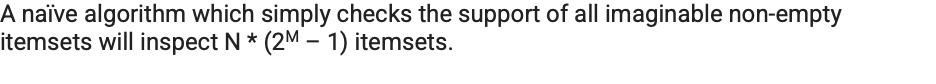

image.png

7. Consider the items from the example in section 1 of this notebook. Construct the smallest possible data set (in the number of transactions) on which Apriori exhibits the worst-case behaviour you described in the previous exercise. You can choose the support threshold freely, so as to achieve this behaviour. Try running the algorithm on this data set and check whether the result matches your expectations.

In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs',
	    'Yogurt','Dill','Apple','Ice cream','Corn','Unicorn']]

transaction = TransactionEncoder()
trans_array = transaction.fit_transform(dataset)
dataframe = pd.DataFrame(trans_array, columns=transaction.columns_)
display(dataframe)

frequent = apriori(dataframe, min_support=1, use_colnames=True)
frequent

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,True,True,True,True,True,True,True,True,True,True,True


,support,itemsets
0,1.0,(Apple)
1,1.0,(Corn)
2,1.0,(Dill)
3,1.0,(Eggs)
4,1.0,(Ice cream)
...,...,...
2042,1.0,"(Ice cream, Dill, Unicorn, Nutmeg, Onion, Yogu..."
2043,1.0,"(Ice cream, Unicorn, Nutmeg, Onion, Yogurt, Ap..."
2044,1.0,"(Ice cream, Dill, Unicorn, Nutmeg, Onion, Yogu..."
2045,1.0,"(Ice cream, Dill, Unicorn, Nutmeg, Onion, Yogu..."


## Assignment 3, part 2 of 2

1. The monthly rainfall in the London borough of Tower Hamlets in 2019 had the following amount of precipitation (measured in mm, values from January-December 2018): {22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82}. Assuming that the data is based on a normal distribution, identify outlier values in the above dataset using the maximum likelihood method.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

rainfall_data = np.array([22.93, 20.69, 25.75, 23.84, 25.34, 3.25, 23.55, 28.28, 23.72, 22.42, 26.83, 23.82])

mu = np.mean(rainfall_data)
sigma = np.std(rainfall_data)

Z_data = (rainfall_data - mu)/sigma
print('All values: ')
print(Z_data)# 5th index is an outlier

All values: 
[ 0.06443672 -0.30097656  0.52446592  0.21288586  0.45758224 -3.14597989
  0.16557789  0.93718716  0.19331015 -0.01876006  0.70064732  0.20962324]


2. Using the house prices dataset from Section 3 of this lab notebook, use PCA to obtain the first 2 principal components (remember that PCA should only be applied on the input attributes, and not the target; remember also to normalise using z-scores for better results). Then, perform outlier detection on the pre-processed dataset using the k-nearest neighbours approach using k=2. Display a scatterplot of the two principal components, where each object is colour-coded according to the computed outlier score.

In [ ]:
from pandas import read_csv

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)

data = df.values

X, y = data[:, :-1], data[:, -1]

print(X.shape, y.shape)

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

Z = (X-mu)/sigma

from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(Z)

projected = pca.transform(Z)
project_h = pd.DataFrame(projected,columns=['pc_1','pc_2'],index=range(1,len(Z)+1))

display(project_h)

(506, 13) (506,)


,pc_1,pc_2
1,-2.098297,0.773113
2,-1.457252,0.591985
3,-2.074598,0.599639
4,-2.611504,-0.006871
5,-2.458185,0.097712
...,...,...
502,-0.314968,0.724285
503,-0.110513,0.759308
504,-0.312360,1.155246
505,-0.270519,1.041362


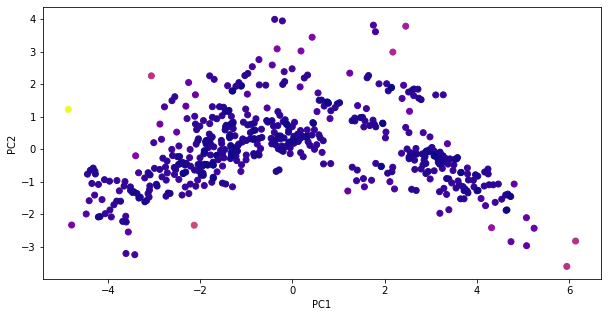

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(projected)
distances, indices = nbrs.kneighbors(projected)
outlier_score = distances[:,knn-1]

fig = plt.figure(figsize=(10,5))
p = plt.scatter(project_h['pc_1'], project_h['pc_2'], c=outlier_score, cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

3. Consider the *absenteeism.csv* data set.

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv("absenteeism.csv", header="infer", delimiter=";")
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


a. The "ID" column is the employee identifier. Consider the number of absences for each employee and find outliers among those values. Use Grubb's test with $\alpha=0.1$ to find said outliers.

In [ ]:
from outliers import smirnov_grubbs as grubbs
absentees_count = pd.DataFrame(df.groupby('ID')['ID'].count())
test = grubbs.min_test(absentees_count['ID'], alpha=0.1)
absentees_count['grubs_test'] = test
print(absentees_count)
print("113 is an outlier")

     ID  grubs_test
ID                 
1    23        23.0
2     6         6.0
3   113         NaN
4     1         1.0
5    19        19.0
6     8         8.0
7     6         6.0
8     2         2.0
9     8         8.0
10   24        24.0
11   40        40.0
12    7         7.0
13   15        15.0
14   29        29.0
15   37        37.0
16    2         2.0
17   20        20.0
18   16        16.0
19    3         3.0
20   42        42.0
21    3         3.0
22   46        46.0
23    8         8.0
24   30        30.0
25   10        10.0
26    5         5.0
27    7         7.0
28   76        76.0
29    5         5.0
30    7         7.0
31    3         3.0
32    5         5.0
33   24        24.0
34   55        55.0
35    1         1.0
36   34        34.0
113 is an outlier


b. The attribute "Reason for absence" is categorical. The label "26" corresponds to "Unjustified absence". Again, consider the number of absences for each employee. However, now you must find contextual outliers among cases of unjustified absences, again using Grubb's test with $\alpha=0.1$.

In [ ]:
absentees = df.loc[df['Reason for absence'] == 26]
absentees_count = pd.DataFrame(absentees.groupby('ID')['ID'].count())
test = grubbs.min_test(absentees_count['ID'], alpha=0.1)
absentees_count['grubs_test'] = test
print(absentees_count)
print("no outliers found")

    ID  grubs_test
ID                
1    2           2
3    1           1
5    9           9
11   6           6
13   2           2
18   2           2
20   4           4
24   2           2
33   1           1
34   3           3
36   1           1
no outliers found
